# Non-linear regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
chinaGDP = pd.read_csv('D:/Extra Classes/Machine Learning/DataSets/china_gdp.csv')
chinaGDP.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


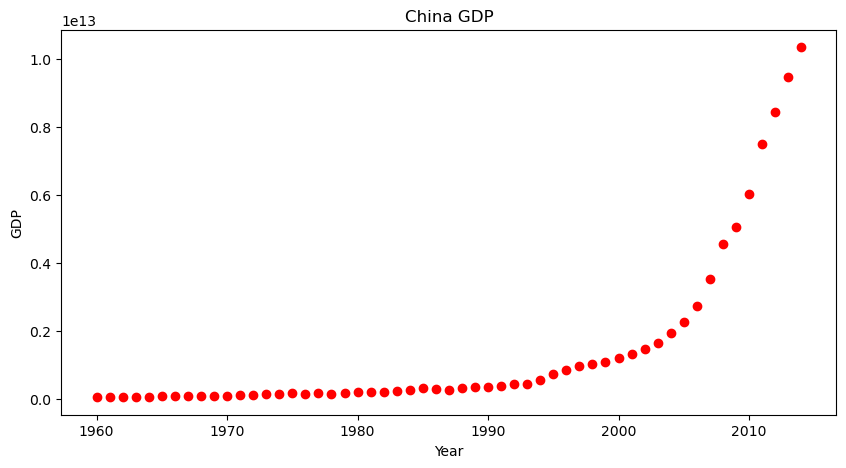

In [16]:
# plottind dataset
plt.figure(figsize = (10,5))
x_data, y_data = (chinaGDP['Year'], chinaGDP['Value'])
plt.plot(x_data, y_data, 'ro')
plt.title('China GDP')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Build model based on logistic function
$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

In [19]:
def sigmoid(x, beta1, beta2):
    y = 1/(1 + np.exp(-beta1 * (x - beta2)))
    return y

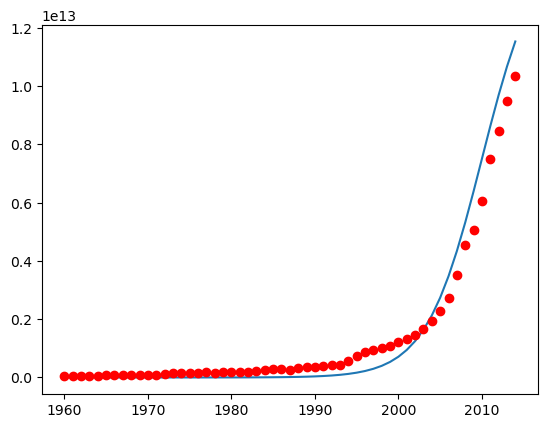

In [35]:
# estimate parameters
beta1 = 0.3
beta2 = 2010

#logistic function
y_pred = sigmoid(x_data, beta1 , beta2)

#plot initial prediction against datapoints
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [37]:
# lets find best parameters
# first lets normalize data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [39]:
# lets fit sigmoid on data
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print best parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


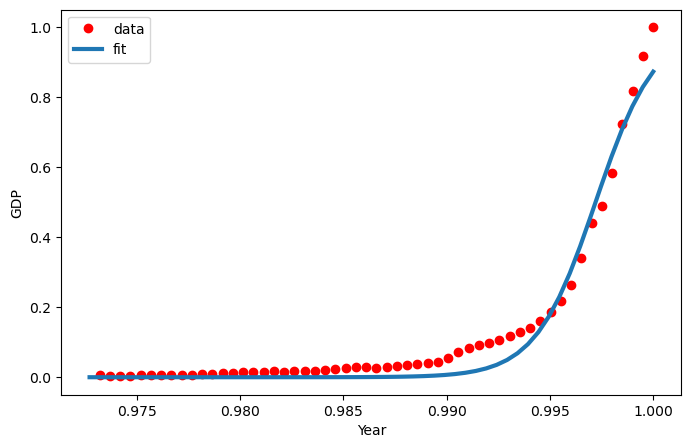

In [41]:
# plot the best sigmoid model and real data
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()